In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets

In [ ]:
# import necessary libraies
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hasithachathuranga
Your Kaggle Key: ··········


100%|██████████| 51.8M/51.8M [00:00<00:00, 54.8MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/asian-vs-african-elephant-image-classification/dataset/train"
test_data_dir = "/content/asian-vs-african-elephant-image-classification/dataset/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE,
                                                              subset='validation',
                                                              validation_split=0.1,
                                                              seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)




Found 840 files belonging to 2 classes.
Using 756 files for training.
Found 840 files belonging to 2 classes.
Using 84 files for validation.
Found 188 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['African', 'Asian']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


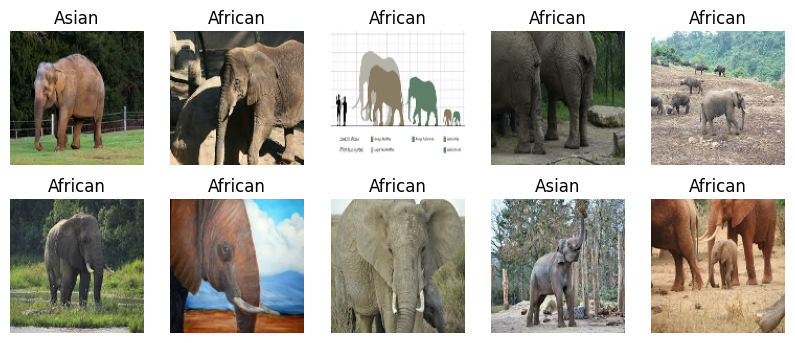

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(10):
    print(image)

tf.Tensor(
[[[[2.50000000e+02 2.44000000e+02 2.18492188e+02]
   [2.48552368e+02 2.42406250e+02 2.20844604e+02]
   [2.47084595e+02 2.40084595e+02 2.22407593e+02]
   ...
   [2.45740845e+02 2.44740845e+02 2.14415283e+02]
   [2.44593750e+02 2.42593750e+02 2.18406250e+02]
   [2.43000000e+02 2.40246094e+02 2.20753906e+02]]

  [[2.49607788e+02 2.43607788e+02 2.21084351e+02]
   [2.49000000e+02 2.42406250e+02 2.22187500e+02]
   [2.47828247e+02 2.41820312e+02 2.24879028e+02]
   ...
   [2.46484497e+02 2.44746216e+02 2.18617554e+02]
   [2.44593750e+02 2.42593750e+02 2.19282959e+02]
   [2.43738281e+02 2.41738281e+02 2.19261719e+02]]

  [[2.48769531e+02 2.41769531e+02 2.23000000e+02]
   [2.49363281e+02 2.42687378e+02 2.24554810e+02]
   [2.50037964e+02 2.43886719e+02 2.30121094e+02]
   ...
   [2.46886719e+02 2.44000000e+02 2.25846558e+02]
   [2.45593750e+02 2.43456909e+02 2.21918091e+02]
   [2.44122437e+02 2.42230469e+02 2.17723999e+02]]

  ...

  [[2.48000000e+02 2.42891968e+02 2.24216064e+02]
   [2

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(10):
    print(image)

tf.Tensor(
[[[[0.8745098  0.91764706 0.9019608 ]
   [0.8773438  0.920481   0.90479475]
   [0.88184744 0.9249847  0.9092984 ]
   ...
   [0.8980392  0.9411765  0.9254902 ]
   [0.89586395 0.9390012  0.9154718 ]
   [0.8901961  0.93333334 0.9019608 ]]

  [[0.8745098  0.91764706 0.9019608 ]
   [0.8773438  0.920481   0.90479475]
   [0.88184744 0.9249847  0.9092984 ]
   ...
   [0.9005668  0.9386489  0.9254902 ]
   [0.89839154 0.93647367 0.9154718 ]
   [0.8927237  0.93333334 0.9019608 ]]

  [[0.8745098  0.91764706 0.9019608 ]
   [0.8773438  0.920481   0.90479475]
   [0.88184744 0.9249847  0.9092984 ]
   ...
   [0.9019608  0.9372549  0.9249081 ]
   [0.8997855  0.9361673  0.9132966 ]
   [0.89411765 0.93333334 0.9019608 ]]

  ...

  [[0.4032823  0.40720388 0.28563526]
   [0.43008578 0.43008578 0.32028186]
   [0.43017614 0.43017614 0.32037222]
   ...
   [0.2531632  0.24139847 0.18257494]
   [0.26915655 0.2613134  0.21099997]
   [0.28501564 0.28501564 0.2379568 ]]

  [[0.3395084  0.3395084  0.229704

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation= 'relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
24/24 [==============================] - 29s 1s/step - loss: 0.7475 - accuracy: 0.5516 - val_loss: 0.6951 - val_accuracy: 0.5238
Epoch 2/20
24/24 [==============================] - 26s 1s/step - loss: 0.6814 - accuracy: 0.5542 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/20
24/24 [==============================] - 25s 1s/step - loss: 0.6828 - accuracy: 0.5608 - val_loss: 0.7030 - val_accuracy: 0.4881
Epoch 4/20
24/24 [==============================] - 25s 1s/step - loss: 0.6696 - accuracy: 0.5794 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 5/20
24/24 [==============================] - 24s 992ms/step - loss: 0.6718 - accuracy: 0.5860 - val_loss: 0.6920 - val_accuracy: 0.4881
Epoch 6/20
24/24 [==============================] - 24s 1s/step - loss: 0.6560 - accuracy: 0.5966 - val_loss: 0.6957 - val_accuracy: 0.4762
Epoch 7/20
24/24 [==============================] - 25s 1s/step - loss: 0.6635 - accuracy: 0.6138 - val_loss: 0.7031 - val_accuracy: 0.5476
Epoch 8/20
24/24 

In [ ]:
history.history

{'loss': [0.7474515438079834,
  0.6813866496086121,
  0.6827952265739441,
  0.6695543527603149,
  0.6718313097953796,
  0.655987560749054,
  0.6635316610336304,
  0.6822473406791687,
  0.6569043397903442,
  0.6617776155471802,
  0.6409437656402588,
  0.6522603631019592,
  0.6705797910690308,
  0.6707160472869873,
  0.6540951728820801,
  0.6699594259262085,
  0.6501374244689941,
  0.6441104412078857,
  0.632755696773529,
  0.635797381401062],
 'accuracy': [0.5515872836112976,
  0.5542327761650085,
  0.5608465671539307,
  0.579365074634552,
  0.5859788656234741,
  0.5965608358383179,
  0.6137565970420837,
  0.5753968358039856,
  0.5767195820808411,
  0.5952380895614624,
  0.6256613731384277,
  0.6296296119689941,
  0.5899471044540405,
  0.5925925970077515,
  0.6150793433189392,
  0.6058201193809509,
  0.6296296119689941,
  0.6164020895957947,
  0.6283068656921387,
  0.6177248954772949],
 'val_loss': [0.6950892210006714,
  0.6933968663215637,
  0.7030227184295654,
  0.6985501646995544,
  

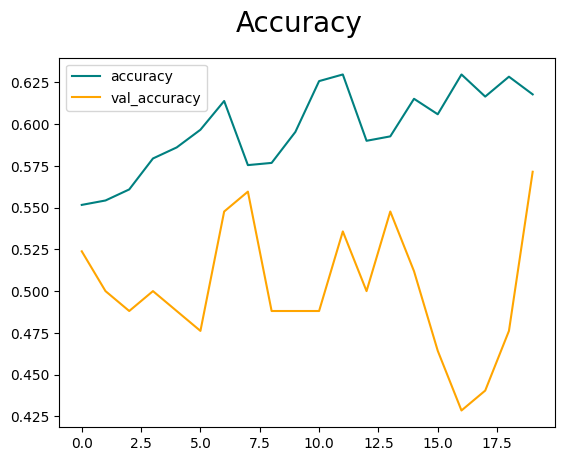

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

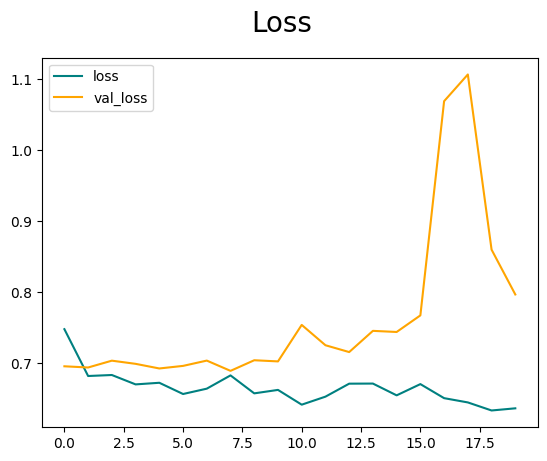

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 215ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.60504204>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7912088>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.64893615>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

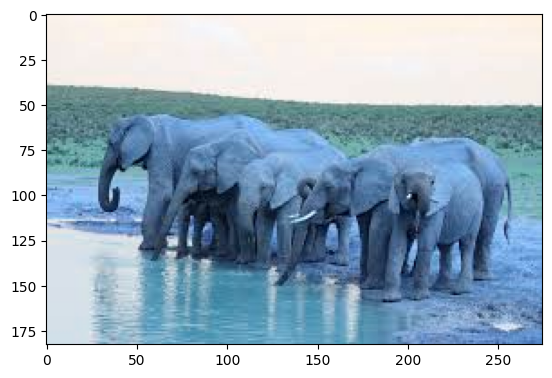

In [ ]:
image = cv2.imread("/content/asian-vs-african-elephant-image-classification/dataset/test/African/af_te28.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.9843137 , 0.9529412 , 0.9254902 ],
        [0.9843137 , 0.9529412 , 0.9254902 ],
        [0.9843137 , 0.9529412 , 0.9254902 ],
        ...,
        [0.99215686, 0.9411765 , 0.8862745 ],
        [0.99215686, 0.9411765 , 0.88409925],
        [0.99215686, 0.9411765 , 0.8784314 ]],

       [[0.98178613, 0.9504136 , 0.9229626 ],
        [0.98178613, 0.9504136 , 0.9229626 ],
        [0.98178613, 0.9504136 , 0.9229626 ],
        ...,
        [0.99468446, 0.94370407, 0.8888021 ],
        [0.99468446, 0.94370407, 0.88662684],
        [0.99468446, 0.94370407, 0.880959  ]],

       [[0.9801011 , 0.94872856, 0.9212776 ],
        [0.9801011 , 0.94872856, 0.9212776 ],
        [0.9801011 , 0.94872856, 0.9212776 ],
        ...,
        [0.9957874 , 0.94509804, 0.8907782 ],
        [0.9957874 , 0.9453891 , 0.89048713],
        [0.9957874 , 0.9453891 , 0.8832261 ]],

       ...,

       [[0.81960785, 0.8784314 , 0.9137255 ],
        [0.81

In [ ]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [ ]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
y_hat

array([[0.31664306]], dtype=float32)

In [ ]:
class_names

['African', 'Asian']

In [ ]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

African
